# Assignment 1: Transformations and Representations

Roll number: \<Roll number here\>


# Instructions

- Code must be written in Python in Jupyter Notebooks. We highly recommend using anaconda distribution or at the minimum, virtual environments for this assignment.
- Save all your results in `results/<question_number>/<sub_topic_number>/`
- For this assignment, you will be using Open3D extensively. Refer to [Open3D Documentation](http://www.open3d.org/docs/release/): you can use the in-built methods and **unless explicitly mentioned**, don't need to code from scratch for this assignment.
- Make sure your code is modular since you may need to reuse parts for future assignments.
- Make sure any extra files you that you need to submit, place it in _'results'_ folder.
- Answer the descriptive questions in your own words with context & clarity. Do not copy answers from online resources or lecture notes.
- The **deadline** for this assignment is on **23/08/2022 at 11:55pm**. Please note that there will be no extensions.
- Plagiarism is **strictly prohibited**.


# Submission Instructions

1. Make sure your code runs without any errors after reinitializing the kernel and removing all saved variables.
2. After completing your code and saving your results, zip the folder with name as `<roll_number>_MR2022_<assignment_number>.zip`


## 1. 3D Data and Open3D

1.  Please find mesh files in **data/Q1** folder. Using these mesh files and your own creativity/visualisation, create a "Table" **pointcloud** scene. The table scene should be realistic, scaled appropiately. Use all the meshes given in the folder and treat them as objects kept on the table.

    You are expected to perform different functions on the individual mesh files: first convert the mesh files to pointclouds and on each pointcloud perform operations such as scaling, rotation, translation. Next, visualize them together. The visualization should represent a pointcloud of a realistic table scene. Save the scene as **.pcd** file.

    **Please do not copy as we may use your contribution to create a table top dataset.**

    Refer below image for example of a table-top scene:

    <img src="img/1.jpeg"  width="500" >

    <br>
    <br>

2.  Use the final table scene pointcloud obtained from part 1.
    - Use Open3D to generate partial pointclouds from different camera views (at least 4 views). This means, that you need to crop or capture the points in the pointcloud that are visible only from a given viewpoint.
    - Using these partial pointclouds, you are now expected to generate the full scene pointcloud back by registering the pointclouds to a global frame. Save the partial and reconstructed pointclouds in different files.
    - **[ BONUS ]** Finally, compute the error using "Chamfer's Distance (CD)" between the ground truth scene pointcloud and the reconstructed pointcloud. Perform an analysis:
      1. Why is the CD not 0?
      2. How does the CD change as the number of viewpoints increase / decrease?
      3. Can we optimize the viewpoints (by hit and trial) such that the CD reduces?

Refer the following link for solving Q1:

- Hidden-Point-Removal Open3D API: http://www.open3d.org/docs/latest/tutorial/Basic/pointcloud.html#Hidden-point-removal

- Chamfer's Distance: https://pytorch3d.readthedocs.io/en/latest/modules/loss.html


In [1]:
import open3d as o3d
import numpy as np


def create_pcd(file_name, translate, rotate, scale):
    mesh = o3d.io.read_triangle_mesh(file_name)
    # print(mesh)
    # o3d.visualization.draw_geometries([textured_mesh])
    pcd = mesh.sample_points_uniformly(
        number_of_points=20000, use_triangle_normal=False, seed=- 1)
    # pcd.colors = mesh.vertex_colors
    # pcd.normals = mesh.vertex_normals
    # print(pcd)
    pcd.translate(translate)
    pcd.rotate(pcd.get_rotation_matrix_from_xyz(rotate),
               center=pcd.get_center())
    pcd.scale(scale, center=pcd.get_center())
    return pcd


q1_dirname = "./data/Q1/"
boat_pcd = create_pcd(q1_dirname + "boat.obj", (-1, 0, -1), (0, np.pi/2, 0), 2)
car_pcd = create_pcd(q1_dirname + "car.obj", (2, 0, -5), (0, 0, 0), 2)
laptop_pcd = create_pcd(q1_dirname + "laptop.obj",
                        (2, 0.4, 1), (0, -np.pi/2, 0), 3)
plane_pcd = create_pcd(q1_dirname + "plane.obj",
                       (-1.5, 0, -4), (0, np.pi/4, 0), 4)
table_pcd = create_pcd(q1_dirname + "table.obj",
                       (-90, -92.25, -27), (-np.pi/2, 0, 0), 0.3)
trashcan_pcd = create_pcd(q1_dirname + "trashcan.obj",
                          (-0.5, 1, 2), (0, 0, 0), 3)
mesh = o3d.io.read_triangle_mesh(q1_dirname + "table.obj")
mesh1 = o3d.geometry.TriangleMesh.create_coordinate_frame()

tabletop_scene_pcd = boat_pcd + car_pcd + \
    laptop_pcd + plane_pcd + table_pcd + trashcan_pcd

o3d.visualization.draw_geometries([tabletop_scene_pcd])
o3d.io.write_point_cloud("results/Question_1/Part_1/tabletop.pcd", tabletop_scene_pcd)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
[Open3D INFO] Skipping non-triangle pri

True

In [2]:
diameter = np.linalg.norm(
    np.asarray(tabletop_scene_pcd.get_max_bound()) - np.asarray(tabletop_scene_pcd.get_min_bound()))

camera = [0, 20, diameter]
radius = diameter * 100

print("Get all points that are visible from given view point 1")
_, pt_map = tabletop_scene_pcd.hidden_point_removal(camera, radius)

pcd = tabletop_scene_pcd.select_by_index(pt_map)
# o3d.visualization.draw_geometries([pcd])
o3d.io.write_point_cloud("results/Question_1/Part_2/partial/view1.pcd", pcd)

camera = [0, 20, -diameter]
radius = diameter * 100

print("Get all points that are visible from given view point 2")
_, pt_map = tabletop_scene_pcd.hidden_point_removal(camera, radius)

pcd1 = tabletop_scene_pcd.select_by_index(pt_map)
# o3d.visualization.draw_geometries([pcd1])
o3d.io.write_point_cloud("results/Question_1/Part_2/partial/view2.pcd", pcd1)

camera = [-20, 0, -diameter]
radius = diameter * 100

print("Get all points that are visible from given view point 3")
_, pt_map = tabletop_scene_pcd.hidden_point_removal(camera, radius)

pcd2 = tabletop_scene_pcd.select_by_index(pt_map)
# o3d.visualization.draw_geometries([pcd2])
o3d.io.write_point_cloud("results/Question_1/Part_2/partial/view3.pcd", pcd2)

camera = [20, 0, -diameter]
radius = diameter * 100

print("Get all points that are visible from given view point 4")
_, pt_map = tabletop_scene_pcd.hidden_point_removal(camera, radius)

pcd3 = tabletop_scene_pcd.select_by_index(pt_map)
# o3d.visualization.draw_geometries([pcd2])
o3d.io.write_point_cloud("results/Question_1/Part_2/partial/view4.pcd", pcd3)

print("Getting the concatenation of the partial pount clouds")
final_pcd = pcd + pcd1 + pcd2 + pcd3

o3d.visualization.draw_geometries([final_pcd])
o3d.io.write_point_cloud("results/Question_1/Part_2/sum_of_partials_tabletop.pcd", final_pcd)


Get all points that are visible from given view point 1
Get all points that are visible from given view point 2
Get all points that are visible from given view point 3
Get all points that are visible from given view point 4
Getting the concatenation of the partial pount clouds


True

## 2. Euler Angles, Rotation Matrices, and Quaternions

1. Write a function (do not use inbuilt libraries for this question):

   - that returns a rotation matrix given the angles $\alpha$, $\beta$, and $\gamma$ in radians (X-Y-Z).
   - to convert a rotation matrix to quaternion and vice versa.

2. What is a Gimbal lock? Suppose an airplane increases its pitch from $0°$ to $90°$.

   - Let $R_{gmb\beta}$ be the rotation matrix for $\beta=90°$. Find $R_{gmb\beta}$.
   - Consider the point $p = [0, 1, 0]ᵀ $ on the pitched airplane, i.e. the tip of the wing. Does there exist any $α , γ$ such that $p_{new} = R_{gmb\beta}\; p$ for:

     1. $p\_{new} = [1, 0, 0]ᵀ $
     2. For some $p_{new}$ on the XY unit circle?
     3. For some $p_{new}$ on the YZ unit circle?

     Show your work for all three parts and briefly explain your reasoning. Why is $\beta=90°$ a “certain problematic value”?

   <img src="img/2.3.jpeg"  width="500" ><br>

   <img src="img/2.1.jpeg"  width="500" ><br>

   <img src="img/2.2.jpeg"  width="500" >


In [3]:
import math
import numpy as np
import open3d as o3d

def gen_rotation_matrix(alpha, beta, gamma):
    rx = np.matrix([[1, 0, 0], [0, math.cos(alpha), -math.sin(alpha)],
                   [0, math.sin(alpha), math.cos(alpha)]])
    ry = np.matrix([[math.cos(beta), 0, math.sin(beta)], [
                   0, 1, 0], [-math.sin(beta), 0, math.cos(beta)]])
    rz = np.matrix([[math.cos(gamma), -math.sin(gamma), 0],
                   [math.sin(gamma), math.cos(gamma), 0], [0, 0, 1]])

    return rx@ry@rz


def convert_to_quaternion(r_matrix):
    print(r_matrix)
    qr = math.sqrt(1 + r_matrix[0, 0] + r_matrix[1, 1] + r_matrix[2, 2]) * 0.5
    qi = abs(
        0.5 * math.sqrt(1 + r_matrix[0, 0] - r_matrix[1, 1] - r_matrix[2, 2]))
    qj = abs(
        0.5 * math.sqrt(1 - r_matrix[0, 0] + r_matrix[1, 1] - r_matrix[2, 2]))
    qk = abs(
        0.5 * math.sqrt(1 - r_matrix[0, 0] - r_matrix[1, 1] + r_matrix[2, 2]))

    if r_matrix[2, 1] - r_matrix[1, 2] < 0:
        qi = -qi
    if r_matrix[0, 2] - r_matrix[2, 0] < 0:
        qj = -qj
    if r_matrix[1, 0] - r_matrix[0, 1] < 0:
        qk = -qk

    return [qr, qi, qj, qk]


def convert_to_r_matrix(q):
    return np.matrix([[-1 + 2 * q[1] ** 2 + 2 * q[0] ** 2, 2 * (q[1] * q[2] - q[0] * q[3]), 2 * (q[1] * q[3] + q[2] * q[0])],
                      [2 * (q[1] * q[2] + q[3] * q[0]), 1 - 2 * q[1] **
                       2 - 2 * q[3] ** 2, 2 * (q[2] * q[3] - q[1] * q[0])],
                      [2 * (q[1] * q[3] - q[2] * q[0]), 2 * (q[2] * q[3] + q[1] * q[0]), 1 - 2 * q[1] ** 2 - 2 * q[2] ** 2]])


x = (gen_rotation_matrix(np.pi/7, np.pi/6, np.pi/8))
y = o3d.geometry.get_rotation_matrix_from_xyz([np.pi/7, np.pi/6, np.pi/8])

q = convert_to_quaternion(x)

print("From Quaternion\n", convert_to_r_matrix(q))
print("Actual\n", x)
print("Open3D\n", y)


[[ 0.80010315 -0.33141357  0.5       ]
 [ 0.54521401  0.74936664 -0.37575434]
 [-0.25015323  0.57324924  0.78026193]]
From Quaternion
 [[ 0.80010315 -0.33141357  0.5       ]
 [ 0.54521401  0.74936664 -0.37575434]
 [-0.25015323  0.57324924  0.78026193]]
Actual
 [[ 0.80010315 -0.33141357  0.5       ]
 [ 0.54521401  0.74936664 -0.37575434]
 [-0.25015323  0.57324924  0.78026193]]
Open3D
 [[ 0.80010315 -0.33141357  0.5       ]
 [ 0.54521401  0.74936664 -0.37575434]
 [-0.25015323  0.57324924  0.78026193]]


$$
R_{gmb\beta} = R_{zyz}(\alpha, \beta, \gamma)\\
= R_x(\alpha)R_y(\beta)R_z(\gamma) = R_x(\alpha)R_y(\pi/2)R_z(\gamma)\\
= \begin{bmatrix}1 & 0 & 0\\ 0 & \cos\alpha & -\sin\alpha\\0 & \sin\alpha & \cos\alpha\end{bmatrix}\begin{bmatrix}\cos\pi/2 & 0 & \sin\pi/2\\ 0 & 1 & 0\\ -\sin\pi/2 & 0 & \cos\pi/2\end{bmatrix}\begin{bmatrix}\cos\gamma & -\sin\gamma & 0\\\sin\gamma & \cos\gamma & 0\\ 0 & 0 & 1\end{bmatrix}\\
= \begin{bmatrix}1 & 0 & 0\\ 0 & \cos\alpha & -\sin\alpha\\0 & \sin\alpha & \cos\alpha\end{bmatrix}\begin{bmatrix}0 & 0 & 1\\ 0 & 1 & 0\\ -1 & 0 & 0\end{bmatrix}\begin{bmatrix}\cos\gamma & -\sin\gamma & 0\\\sin\gamma & \cos\gamma & 0\\ 0 & 0 & 1\end{bmatrix}\\
= \begin{bmatrix}0 & 0 & 1\\ \sin\alpha & \cos\alpha & 0\\ -\cos\alpha & \sin\alpha & 0\end{bmatrix}\begin{bmatrix}\cos\gamma & -\sin\gamma & 0\\\sin\gamma & \cos\gamma & 0\\ 0 & 0 & 1\end{bmatrix}\\
= \begin{bmatrix}0 & 0 & 1\\\cos\gamma\sin\alpha + \cos\alpha\sin\gamma & \cos\gamma\cos\alpha - \sin\alpha\sin\gamma & 0\\ -\cos\gamma\cos\alpha + \sin\alpha\sin\gamma & \cos\gamma\sin\alpha + \cos\alpha\sin\gamma & 0\end{bmatrix}\\
= \begin{bmatrix}0 & 0 & 1\\
\sin(\alpha + \gamma) & \cos(\alpha + \gamma) & 0\\-\cos(\alpha + \gamma) & \sin(\alpha + \gamma) & 0\end{bmatrix}
$$

Thus the gimbal matrix is given by,

$$R_{gmb\beta} = \begin{bmatrix}0 & 0 & 1\\
\sin(\alpha + \gamma) & \cos(\alpha + \gamma) & 0\\-\cos(\alpha + \gamma) & \sin(\alpha + \gamma) & 0\end{bmatrix}$$

## Question 2.2.1

Consider $p = \begin{bmatrix}0 & 1 & 0\end{bmatrix}^T$.

Find $p_{new}$ such that $p_{new} = R_{gmb\beta}p\ $ where $p_{new} = \begin{bmatrix}1 & 0 & 0\end{bmatrix}^T$

Therefore,

$$\begin{bmatrix}1 \\ 0 \\ 0\end{bmatrix} = \begin{bmatrix}0 & 0 & 1\\
\sin(\alpha + \gamma) & \cos(\alpha + \gamma) & 0\\-\cos(\alpha + \gamma) & \sin(\alpha + \gamma) & 0\end{bmatrix}\begin{bmatrix}0 \\ 1 \\ 0\end{bmatrix}$$

$$\begin{bmatrix}1 \\ 0 \\ 0\end{bmatrix} = \begin{bmatrix}0 \\ \cos(\alpha + \gamma) \\ \sin(\alpha + \gamma)\end{bmatrix}$$

This is not possible since $1\neq 0$.

Thus there is no $\alpha$ and $\gamma$ such that $p_{new} = R_{gmb\beta}p$.

## Question 2.2.2

Find $p_{new}$ such that $p_{new} = R_{gmb\beta}p$ where $p_{new}$ is on the XY unit circle.

If $p_{new}$ is on the XY unit circle, it should be of the form $\begin{bmatrix}a & b & 0\end{bmatrix}^T$ where $a^2 + b^2 = 1$.

Thus,

$$\begin{bmatrix}a \\ b \\ 0\end{bmatrix} = \begin{bmatrix}0 & 0 & 1\\
\sin(\alpha + \gamma) & \cos(\alpha + \gamma) & 0\\-\cos(\alpha + \gamma) & \sin(\alpha + \gamma) & 0\end{bmatrix}\begin{bmatrix}0 \\ 1 \\ 0\end{bmatrix}$$

$$\begin{bmatrix}a \\ b \\ 0\end{bmatrix} = \begin{bmatrix}0 \\ \cos(\alpha + \gamma) \\ \sin(\alpha + \gamma)\end{bmatrix}$$

Thus $a = 0$ and $b = 1$ (since $a^2 + b^2 = 1$).

Hence, $\cos(\alpha + \gamma) = 1$ and $\sin(\alpha + \gamma) = 0$ which implies $\alpha + \gamma = \pi/2$. 

Thus it is not possible to find $\alpha,\gamma$ such that $p_{new} = R_{gmb\beta}p$ for any $p_{new}$ on the XY unit circle. There is only one point on the unit circle for which the condition is satisfied and this is when $\alpha + \gamma = \pi/2$.

## Question 2.2.3

Find $p_{new}$ such that $p_{new} = R_{gmb\beta}p$ where $p_{new}$ is on the YZ unit circle.

If $p_{new}$ is on the YZ unit circle, it should be of the form $\begin{bmatrix}0 & a & b\end{bmatrix}^T$ where $a^2 + b^2 = 1$.

Thus,

$$\begin{bmatrix}0 \\ a \\ b\end{bmatrix} = \begin{bmatrix}0 & 0 & 1\\
\sin(\alpha + \gamma) & \cos(\alpha + \gamma) & 0\\-\cos(\alpha + \gamma) & \sin(\alpha + \gamma) & 0\end{bmatrix}\begin{bmatrix}0 \\ 1 \\ 0\end{bmatrix}$$

$$\begin{bmatrix}0 \\ a \\ b\end{bmatrix} = \begin{bmatrix}0 \\ \cos(\alpha + \gamma) \\ \sin(\alpha + \gamma)\end{bmatrix}$$

Thus, $a = \cos(\alpha + \gamma)$ and $b = \sin(\alpha + \gamma)$.

$a^2 + b^2 = \cos(\alpha + \gamma)^2 + \sin(\alpha + \gamma)^2 = 1$. Thus all points on the YZ unit circle can be represented by $p_{new} = R_{gmb\beta}p$ and for some $(a, b)$ we can find some $\alpha, \gamma$ such that $\alpha + \gamma = \cos^{-1}(a)$

## 3. Transformations and Homogeneous Coordinates

1. Watch this [video](https://www.youtube.com/watch?v=PvEl63t-opM) to briefly understand homogeneous coordinates.
   1. What are points at infinity? What type of transformation can you apply to transform a point from infinity to a point that is not at infinity?
   2. Find the vanishing point for the given images in the **data/Q3** folder. Complete function **FilterLines()** and **GetVanishingPoint()** in the given starter code.

<br>

2. Using homogeneous coordinates we can represent different types of transformation as point transforms vs. frame transforms. Concatenation of transforms (whether you post multiply transformation matrices or pre-multiply transformation matrices) depends on the problem and how you are viewing it. Try to understand the difference between frame vs. point transformations from this [video](https://youtu.be/Za7Sdegf8m8?t=1834). We have 5 camera frames A, B, C, D and E. Given _frame_ transformation $A \rightarrow B$ , $B \rightarrow C$ , $D \rightarrow C$ , $D \rightarrow E$. Compute _frame transformation_ $D \rightarrow E$. Also, given the co-ordinates of a point _x_ in _D's_ frame, what transformation is required to get _x's_ co-ordinates in _E's_ frame?

<img src="img/3.jpeg"  width="500" >


# Question 3.1.1

Points at infinity are those points which are infinitely far away. For example, when we view two parallel lines from a certain point, they appear to meet at some point infinitely far away.

We can apply a projective transformation to a point that is at infinity to bring it to a point that is not at infinity.

['hyperspace.jpeg', 'hall.jpeg', 'rail.jpg']


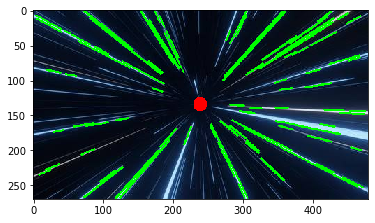

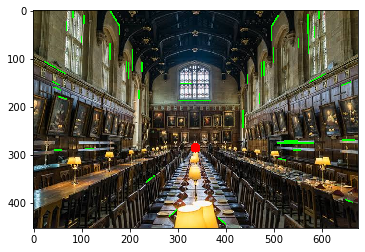

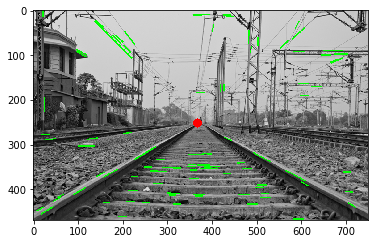

In [2]:
import os
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt


def ReadImage(InputImagePath):
    Images = []                     # Input Images will be stored in this list.
    # Names of input images will be stored in this list.
    ImageNames = []

    # Checking if path is of file or folder.
    if os.path.isfile(InputImagePath):						    # If path is of file.
        # Reading the image.
        InputImage = cv2.imread(InputImagePath)

        # Checking if image is read.
        if InputImage is None:
            print("Image not read. Provide a correct path")
            exit()

        # Storing the image.
        Images.append(InputImage)
        # Storing the image's name.
        ImageNames.append(os.path.basename(InputImagePath))

        # If path is of a folder contaning images.
    elif os.path.isdir(InputImagePath):
        # Getting all image's name present inside the folder.
        for ImageName in os.listdir(InputImagePath):
            # Reading images one by one.
            InputImage = cv2.imread(InputImagePath + "/" + ImageName)

            Images.append(InputImage)							# Storing images.
            # Storing image's names.
            ImageNames.append(ImageName)

    # If it is neither file nor folder(Invalid Path).
    else:
        print("\nEnter valid Image Path.\n")
        exit()

    return Images, ImageNames


def GetLines(Image):

    # Converting to grayscale
    GrayImage = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
    # Blurring image to reduce noise.
    BlurGrayImage = cv2.GaussianBlur(GrayImage, (5, 5), 1)
    # Generating Edge image
    EdgeImage = cv2.Canny(BlurGrayImage, 40, 255)

    # Finding Lines in the image
    Lines = cv2.HoughLinesP(EdgeImage, 1, np.pi / 180, 50, 10, 15)

    # print(Lines)

    # from matplotlib import pyplot as plt
    # plt.imshow(EdgeImage, interpolation='nearest')
    # plt.show()

    # Check if lines found and exit if not.
    if Lines is None:
        print("Not enough lines found in the image for Vanishing Point detection.")
        exit(0)

    return Lines


def FilterLines(Lines):
    FinalLines = []
    for line in Lines:
        [[x1, y1, x2, y2]] = line
        if x2 != x1:
            m = (y2 - y1) / (x2 - x1)
        else:
            m = 1000000000 # Set slope to near-infinity
        c = y1 - m * x1
        l = np.sqrt((y2 - y1) ** 2 + (x2 - x2) ** 2)

        deg = abs(math.degrees(math.atan(m)))
        if deg <= 85: # Avoid near vertical lines
            FinalLines.append([m, c, l])

    if len(FinalLines) > 10: # Take the longest 10 lines to prevent lag
        FinalLines = sorted(FinalLines, key=lambda x: x[-1], reverse=True)
        FinalLines = FinalLines[:10]

    return FinalLines


def GetVanishingPoint(FilteredLines):

    vanishingpoint = None
    MinError = 1000000000

    for i in range(len(FilteredLines)):
        for j in range(i + 1, len(FilteredLines)):
            [m1, c1, l1] = FilteredLines[i]
            [m2, c2, l2] = FilteredLines[j]
            if (m1 == m2):
                continue
            x = (c2 - c1) / (m1 - m2)
            y = m1 * x + c1

            error = 0
            for k in range(len(FilteredLines)):
                if k == i or k == j:
                    continue
                [m, c, l] = FilteredLines[k]
                m_perp = -1 / m
                c_perp = y - x * m_perp

                x_perp = (c_perp - c) / (m - m_perp)
                y_perp = m_perp * x_perp + c_perp

                error += (x_perp - x) ** 2 + (y_perp - y) ** 2
            error = math.sqrt(error)

            if MinError > error:
                MinError = error
                vanishingpoint = [x, y]

    return vanishingpoint


# Reading all input images
Images, ImageNames = ReadImage("./data/Q3/")

# print(Images)
print(ImageNames)

for i in range(len(Images)):
    Image = Images[i]

    # Getting the lines form the image
    Lines = GetLines(Image)

    FilteredLines = FilterLines(Lines)
    # Get vanishing point
    VanishingPoint = GetVanishingPoint(FilteredLines)

    # Checking if vanishing point found
    if VanishingPoint is None:
        print("Vanishing Point not found. Possible reason is that not enough lines are found in the image for determination of vanishing point.")
        continue

    # Drawing lines and vanishing point
    # print(Lines)
    for Line in Lines:
        cv2.line(Image, (Line[0][0], Line[0][1]),
                 (Line[0][2], Line[0][3]), (0, 255, 0), 2)
    cv2.circle(Image, (int(VanishingPoint[0]), int(
        VanishingPoint[1])), 10, (0, 0, 255), -1)

    # Showing the final image
    plt.imshow(cv2.cvtColor(Image, cv2.COLOR_BGR2RGB))
    plt.show()
    # cv2.waitKey(0)

## Question 3.2

For camera frames A, B, C, D, E we are given the frame transformations A to B, B to C, D to C and A to E. We need to find the frame transformation D to E.

We know that,

$$T_A^E = T_D^E\times T_C^D\times T_B^C\times T_A^B$$

Since the frame transformations are given with respect to the camera frame, they need to be postmultiplied. We need to find $T_D^E$ and we do not have $T_C^D$. But we have $T_D^C$ and we can find the transformation from C to D by just taking the inverse.

Therefore, $T_C^D = {T_D^C}^{-1}$.

Thus,

$$T_A^E = T_D^E\times {T_D^C}^{-1}\times T_B^C\times T_A^B$$

We then postmultiply the inverse of $T_A^B\times T_B^C\times {T_D^C}^{-1}$ on both sides to get,

$$T_A^E \times({T_D^C}^{-1}\times T_B^C\times T_A^B)^{-1} = T_D^E$$

$$T_D^E = T_A^E \times({T_D^C}^{-1}\times T_B^C\times T_A^B)^{-1}$$

$$T_D^E = T_A^E\times {T_A^B}^{-1}\times {T_B^C}^{-1}\times T_D^C$$

We have now been asked to find the transformation of a point x in D's frame to E's frame. Therefore,

$$x' = T_D^Ex$$

$$x' = T_A^E\times {T_A^B}^{-1}\times {T_B^C}^{-1}\times T_D^C x$$

## 4. LiDAR and Registration

Point clouds are a collection of points that represent a 3D shape or feature. Each point has its own set of X, Y and Z coordinates and in some cases additional attributes. A popular way to obtain this is by photogrammetry, though here we will use LiDAR data.

LiDAR is a remote sensing process which collects measurements used to create 3D models and maps of objects and environments. Using ultraviolet, visible, or near-infrared light, LiDAR gauges spatial relationships and shapes by measuring the time it takes for signals to bounce off objects and return to the scanner.

Download the data from [here](https://iiitaphyd-my.sharepoint.com/:f:/g/personal/venkata_surya_students_iiit_ac_in/EnYAMaTVIhJItzKYqtahE30BRKB6p6UfHN3TyJzvo6Mw0g?e=PegWds). It contains the LIDAR sensor output and odometry information per frame.

The .bin files contain the 3D point cloud captured by the LIDAR in this format - x, y, z, and reflectance.

The odometry information is given in the `odometry.txt` file, which is a 12 element vector. Reshape each of the first 77 rows to a 3x4 matrix to obtain the pose.

The point cloud obtained is with respect to the LiDAR frame. The poses however, are in the camera frame. If we want to combine the point clouds from various frames, we need to bring them to the camera frame.

1.  Refer to the image below and apply the required transformation to the point cloud.
    <br>

    <img src="img/4.jpeg"  width="500"/>

<br>

2. Then, register all point clouds into a common reference frame and visualise it (Open3D). It is helpful to use homogeneous coordinates to keep track of the different frames.

3. Write a function to transform the registered point cloud from the world to the $i^{th}$ camera frame, wherein $i$ is the input to the function.


In [1]:
import numpy as np
import math
import open3d as o3d
import os
import random

inputfile = 'data/data/LiDAR/'

odomfile = 'data/data/odometry.txt'

with open(odomfile) as myfile:
    head = [[float(i) for i in next(myfile).strip().split()] for x in range(77)]

poses = []
for i in head:
    poses.append(np.array(i).reshape(3, 4))

if os.path.isdir(inputfile):
    pc = o3d.geometry.PointCloud()
    for binfile, pose in zip(sorted(os.listdir(inputfile)), poses):
        num = np.fromfile(inputfile + '/' + binfile, dtype='float32', count=-1, sep='', offset=0)
        new = np.asarray(num).reshape(-1, 4)

        X = new[:, 0]
        Y = new[:, 1]
        Z = new[:, 2]
        W = new[:, 3]

        xyz = np.zeros((3, np.size(X)))
        xyz[0, :] = X
        xyz[1, :] = Y
        xyz[2, :] = Z
        camera_xyz = np.array([[0, -1, 0], [0, 0, -1], [1, 0, 0]])@xyz # Bring point cloud to camera frame
        camera_xyz = np.vstack((camera_xyz, np.ones((1, np.size(X))))) # Homogenize
        transform = np.eye(4, 4)
        transform[:3, :3] = ((pose[:, :3]))
        transform[:3, -1] = pose[:, -1]
        transform[3, 3] = 1
        ground_xyz = transform@camera_xyz # Transform the camera points to the world
        ground_xyz = np.transpose(ground_xyz)
        pc1 = o3d.geometry.PointCloud()
        pc1.points = o3d.utility.Vector3dVector(ground_xyz[:, :3])
        pc = pc + pc1
    points = np.asmatrix(random.choices(pc.points, k=350000)) # Take random points from the point cloud to prvent lag
    pcd = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(np.asarray(points)))
    o3d.visualization.draw_geometries([pcd])
    o3d.io.write_point_cloud('results/Question_4/registered_point_cloud.pcd', pcd)
else:
    print("\nEnter valid LIDAR data folder.\n")
    exit()

def world_to_ith_camera_frame(pcd, i): # 0-indexing
    points = np.asarray(pcd.points, dtype='float32')
    world_xyz = np.transpose(points)
    world_xyz = np.vstack((world_xyz, np.ones((1, world_xyz.shape[1]))))
    transform = np.eye(4, 4)
    transform[:3, :3] = (poses[i][:, :3])
    transform[:3, -1] = poses[i][:, -1]
    transform[3, 3] = 1
    camera_xyz = np.transpose(np.linalg.inv(transform)@world_xyz) # Take the inverse of the pose matrix for camera frame
    pc = o3d.geometry.PointCloud()
    pc.points = o3d.utility.Vector3dVector(camera_xyz[:, :3]) 

    return pc

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
